# Homework 6: Logistic Regression

In this homework we will implement the Logistic Regression algorithm using Gradient Descent.

We use as reference the chapter 9 and 24 of Understanding Machine Learning.

Copy this notebook and insert the corresponding names on the file.


This exercise can be done in pairs. **You must first copy this notebook to your own google drive, mount it and complete the code as requested. Some of the questions require you to write on a comment cell.**

After completing the notebook you must download it and manually send it before the deadline by email to the email: si221.micas911@gmail.com

Copy this notebook and insert the corresponding names on the file.

**If you have any questions feel free to send an email to the TA's:**

### breno.skuk@gmail.com

### julien.beguinot@telecom-paris.fr


# Part 1: From theory to algorithm
## Logistic Regression in a nutshell

Here we will take a look into the Logistic Regression algorithm used for binary classification.

Unlike the perceptron algorithm, logistic regression does not output the label directly, but the probability that a given label belongs to a class (a value in the interval $[0,1]$), and training is done by minimizing the maximum a posteriori likelihood of observing the samples given the training parameter.

Interestingly Logistic regression can indeed be "seen" from both a machine learning and a statistical point of view. In the context of machine learning, it's a classification algorithm. From the statistical perspective, it's a form of regression used to predict the probability of an event occurring.

<img src="https://studymachinelearning.com/wp-content/uploads/2019/09/sigmoid_graph.png" width=400/>

**Figure 1** : Sigmoid Function.

Let us define the logistic function $\sigma: \mathbb{R} → [0,1]$ (also known as sigmoid, see **Figure 1**) as follows:

$$\sigma(x) = \frac{e^{x}}{1+e^{x}} = \frac{1}{1+e^{-x}} = 1 - \sigma(-x) \tag{1}$$

Given a set of input data from $X \in \mathbb{R}^d$, and their corresponding labels from $Y \in \{0, 1\}$, the goal of Logistic Regression is to map the input $x$ via a Hypothesis function $\mathcal{h}_W$ with parameters $W$ to $\{0,1\}$.

The hypothesis class $\mathcal{H}_W$ is defined as the set of functions parametrized by $W$:

$$\mathcal{H}_W = \{x \mapsto \sigma(\langle W, x \rangle ): W \in \mathbb{R}^d \}$$

such that for $\mathcal{h}_W \in \mathcal{H}_W$ we write

$$ \mathcal{h}_W:x \in \mathbb{R}^d → [0, 1]$$

$$x \mapsto \sigma(\langle W , x \rangle)$$

Where $\sigma:x \in \mathbb{R} → [0, 1]$ is the **sigmoid** or the **logistic** function, as previously defined in $(1)$.


An interesting property of the $\sigma$ function that partly motivates its use is given by it's derivative, as expressed below:

\begin{align} \tag{2}
\sigma'(x) &= \frac{d}{dx} \frac{1}{1+e^{-x}} \\
&= \frac{-1}{(1+e^{-x})^2} (-e^{-x}) \\
&= \frac{1}{1+e^{-x}} \cdot \big(\frac{e^{-x}}{1+e^{-x}}\big)\\
&= \sigma(x) \cdot \sigma(-x)\\
&= \sigma(x) (1-\sigma(x))
\end{align}

## Prediction

Notice that the hypothesis class $\mathcal{H}_W$ does not contain functions that map the input to $\{0,1\}$, but instead to the interval $[0,1]$.

We will show in the following section the probabilistic interpretation of this hypothesis class, and motivate the following labeling rule:

$$
    y_{pred}=
\begin{cases} \tag{3}
    1 & \text{if } \mathcal{h}_W(x) \geq 0.5\\
    0,              & \text{otherwise}
\end{cases}
$$

Note that in view of Figure 1 when $\langle W , x \rangle$ is positive and large then $\sigma(\langle W , x \rangle)$ is close to 1, whereas if
$\langle W , x \rangle$ is negative and large in absolute value, then $\sigma(\langle W , x \rangle)$ is close to 0.

Remember that $\langle W , x \rangle$ is the distance of $x$ to a hyperplane corresponding to $W$.
There is a resemblance on how we performed the prediction on the perceptron and SVM, where we based our analisys by studying  $sign(\langle W , x \rangle)$.  

However, our halfpsace prediction was being performed with $\{-1,1\}$ labels whereas now we are working with $\{0,1\}$

## Probabilistic Model
Let $S^N = (x_i,y_i)_{i\in[N]} \overset{\mathrm{iid}}{\sim} (X,Y)^N$ be a training set with $N$ samples.

If we assume that:
$$ p(y_i = 1 | x_i, W) = \mathcal{h}_W(x_i) $$
$$ p(y_i = 0 | x_i, W) = 1 - \mathcal{h}_W(x_i) $$

We can write the equations above compactly as:

$$ p(y_i | x_i, W) = (\mathcal{h}_W(x_i))^{y_i} \cdot (1 - \mathcal{h}_W(x_i))^{1-y_i} \tag{4}$$

We can write the likelihood of the parameters as product of the likelihood for each point as follow (where we make use of the $\mathrm{iid}$ sampling):

\begin{align}
L(W) &= p(Y^N | X^N, W)\\
&= \prod^N_{i=1} p(y_i | x_i, W) \\
&= \prod^N_{i=1} (\mathcal{h}_W(x_i))^{y_i} \cdot (1 - \mathcal{h}_W(x_i))^{1-y_i} \\ \tag{5}
\end{align}

This is the well established statistical problem of finding a Maximum Likelihood Estimator, and we write the optimization as:

$$
W = arg \max_{W' \in \mathbb{R^d}} L(W') \tag{6}
$$


We can conviniently write an equivalent optimization problem by maximizing the log likelihood. This is possible because $log$ is a monotonically increasing function:

\begin{align} \tag{7}
\mathcal{L}(W) &= \log L(W) \\
&= \sum_{i=1}^{N} y_i \log(\mathcal{h}_W(x_i)) + (1-y_i) \log(1-\mathcal{h}_W(x_i))
\end{align}

The parameter $W$ is then given by:

$$
W = arg \max_{W' \in \mathbb{R^d}} \mathcal{L}(W')  \tag{8}
$$

To solve the maximization problem, we use **gradient ascent**. Written in vectorial notation, our updates will therefore be given by $W ← W + lr \cdot \nabla_W \mathcal{L}(W)$. (Note the positive rather than negative sign in the update formula, remember that we’re maximizing, rather than minimizing a function now)

With the change of representation of $x_i$ to facilitate the notation:
$W = [w_1, w_2, ..., w_j, ..., w_d], \quad x_i = [x_1^{(i)}, x_2^{(i)}, ..., x_j^{(i)}, ..., x_d^{(i)}]$

For any given sample, the gradient of the logistic loss function with respect to $W$ is given by :
$$\nabla \mathcal{L}(W) = \left[\frac{\partial \mathcal{L}(W)}{\partial w_1}, \cdots, \frac{\partial \mathcal{L}(W)}{\partial w_j}, \cdots, \frac{\partial \mathcal{L}(W)}{\partial w_d}\right] $$

The derivative of the likelihood with respect to a single coordinate can be easily obtained by using $(2)$ as:

$$ \frac{\partial}{\partial w_j} \mathcal{L}(W) = \frac{1}{N} \sum^N_{i=1}\left(y^{(i)}-\mathcal{h}_W(x^{(i)})\right) x_j^{(i)}$$

For each coordinate we have:

$$\nabla \mathcal{L}(W) = \frac{1}{N} \sum^N_{i=1} \left(y^{(i)}-h_W(x^{(i)})\right) \cdot\left[x_1^{(i)}, ..., x_j^{(i)}, ..., x_d^{(i)}\right] = \frac{1}{N} \sum^N_{i=1} \left(y^{(i)}-h_W(x^{(i)})\right) x^{(i)} $$

Finally, the gradient ascent step is given by:

$$ W^{(t+1)} ← W^{(t)} + lr \cdot \frac{1}{N} \sum^N_{i=1} \left(y_i-h_W(x_i)\right) x_i$$

## Question 1:
(a) In the deduction above we atack the problem of learning through data from the statistical point of view.

Usually, in machile learning we would choose a loss function $l_{logistic}$, write the Empirical Risk as the average value of the loss, and finally verify that for our $\mathcal{H}_W$,  $\mathcal{h}_W \in ERM_{h_W' \in \mathcal{H}_W} (\mathcal{L}(\mathcal{h}'_W))$ is minimizing the true Risk.

Can you spot the analogous to the loss function in $(7)$? Can this problem be made equivalent to a binary classification into $\{-1,1\}$?

(b) Discuss the similarities between linear regression and logistic regression. What types of problems are the most appropriate for them? Are they equivalent in some way?

**ANSWER (A):**

**ANSWER (B):**

## Question 2:
Fill out the code snippets below to implement the Logistic Regression and test its results

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Your Imports go here

### Compute the logistic (also known as sigmoid) function

In [ ]:
def sigmoid(u):
  """
  Compute the sigmoid

  Parameters:
  -----------
  `u` : real number

  Returns:
  --------
  `sigma` : Computed sigma(u)

  """
  # preventing overflow in np.exp
  return (np.exp(u)/(1+np.exp(u)))

def sigmoid_vector(xW):
  """
  Compute the sigmoid

  Parameters:
  -----------
  `u` : vector

  Returns:
  --------
  `sigma` : Computed sigma(u)
  """
  hw=np.zeros((1,len(xW[0])))
  for i in range(len(xW[0])):
    hw[0,i]=(sigmoid(xW[0,i]))
  return hw


### Compute the cost and its gradient using previously defined equations

In [ ]:
def getCost(W, X, Y):
  """
  Compute the cost

  Parameters:
  -----------
  `W` : SVM Weights [d x 1]
  `X` : Input data [d x N]
  `Y` : Labels [1 x N]

  Returns:
  --------
  `J` : Computed cost

  """
  hwi = sigmoid(np.dot(np.transpose(X), W))

  return (np.transpose(Y) * np.log(hwi) + (1 - np.transpose(Y) * np.log(1 - hwi))).sum()

def getGradients(W, X, Y):
  """
  Compute the cost gradients

  Parameters:
  -----------
  `W` : SVM Weights [d x 1]
  `X` : Input data [d x N]
  `Y` : Labels [1 x N]

  Returns:
  --------
  `dJ` : Computed gradients

  """
  hwi = sigmoid(np.dot(np.transpose(X), W))


  N = len(X[0])
  L = (1/N)*(X * (Y - np.transpose(hwi))).sum(1)

  return L[:, None]

### Perform a Gradient Descent Step

In [ ]:
def gradDescent(W, X, Y, lr):
  """
  Update the weights with gradient descent

  Parameters:
  -----------
  `W` : SVM Weights [d x 1]
  `X` : Input data [d x N]
  `Y` : Labels [1 x N]
  `lr` : Learning Rate
  'epochs' number of max iteration if not converge with precision (base 1000)
  'precision' desire variation betwween w_old and w_new to stop the descent

  Returns:
  --------
  `W` : Updated weights [d x 1]

  """
  Wt = W + lr*getGradients(W, X, Y)
  return Wt

### Logistic Regression functions for training and testing

In [ ]:
def logRegTrain(X, Y, lr,maxEpochs=1000, minCostDiff=1e-4):
  """
  Train the Logistic Regression Model

  Parameters:
  -----------
  `X` : Training inputs [d x N]
  `Y` : Training Labels [1 x N]
  `lr` : Learning Rate
  `maxEpochs` : Maximum number of epochs before stopping the training
  `minCostDiff` : Minimum cost difference

  Returns:
  --------
  `W` : Trained weights [d x 1]
  'Js' : cost function at each epoch
  """

  d = len(X)
  N = len(X[0])

  # Randomly initialze the weights
  W = np.random.random((d, 1))
  print(W.shape)
  prevCost = getCost(W, X, Y)
  J = [prevCost]
  epoch = 0

  converged = False # Boolean variable for convergence critereon

  while not converged:

    epoch += 1
    W = gradDescent(W, X, Y, lr)
    newCost = getCost(W, X, Y)
    J.append(newCost)
    converged = (np.abs(newCost - prevCost) <= minCostDiff) or epoch >= maxEpochs
    prevCost = newCost

  return W, J

In [ ]:
def logResTest(W, X, Y):
  """
  Test the SVM Model

  Parameters:
  -----------
  `W` : Trained weights [d x 1]
  `X` : Testing inputs [d x N]
  `Y` : Testing Labels [1 x N]

  Returns:
  --------
  `A` : Accuracy
  `P` : Precision
  `R` : Recall

  """
  N = len(X[0])

  hwi = sigmoid(np.dot(np.transpose(X), W))
  Y = Y.T
  Y_pred = hwi >= 0.5

  A = np.mean(Y_pred == Y)
  P = np.sum(np.logical_and(Y_pred == Y, Y_pred == 1)) / np.sum(Y_pred)
  R = np.sum(np.logical_and(Y_pred == Y, Y_pred == 1)) / np.sum(Y)

  return A, P, R

### Plot the data and the results
Functions for :

- Getting the decision boundry from the weights and plotting it with the data.

- Cost function evolution.

In [ ]:
def plotData(W, X, Y, xlabel=None, ylabel=None, tick_labels=None):
  """
  Plot the data alongside the decision boundary

  Parameters:
  -----------
  `W` : Trained weights [d x 1]
  `X` : Training and testing inputs [d x N]
  `Y` : Training and testing Labels [1 x N]

  """
  plt.figure( figsize=(8,6) )

  sc = plt.scatter( X[0,:], X[1,:], c=Y )
  cb = plt.colorbar(sc)
  cb.set_ticks( np.sort( np.unique(Y) ) )
  if tick_labels != None:
    cb.set_ticklabels( tick_labels )
  if xlabel != None:
    plt.xlabel(xlabel, fontsize=14)
  if ylabel != None:
    plt.ylabel(ylabel, fontsize=14)

  if W.size != 0:
    # separating hyperplane
    y1, y2 = plt.ylim()

  if W.shape[0] == 3:
    w1 = W[0]
    w2 = W[1]
    b  = W[2]

  else:
    w1 = W[0]
    w2 = W[1]
    b  = 0


    lb = min(X[0,:])
    ub = max(X[0,:])


    # Plotting the line using w1, w2, and b
    x_line = np.linspace(lb, ub, 400)  # Generate x values
    y_line = (-b - w1 * x_line) / w2  # Calculate corresponding y values

    plt.plot(x_line, y_line, c='black', linestyle='--')


    plt.ylim(y1, y2)

    # Add a grid
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.show()

def plotConvCurve(Js):
  """
  Plot the cost function evolution

  Parameters:
  -----------
  `Js` : Calculated costs at each epoch
  """
  plt.plot(Js)
  plt.show()

### Synthetic Data generation :
Consider a data set $\{x(n), d(n)\}^{200}_{n=1}$ consisting of $200$ points $x(n) = (x_1(n), x_2(n))$ and
their corresponding labels $d(n)$, such that the first $100$ points have label $d(n) = 1$ and
are generated according to a Gaussian distribution $x(n) ∼ \mathcal{N} ([1, 0] , \sigma^2
I)$, and such that
the other $100$ points have label $d(n) = 0$ and are generated according to a Gaussian
distribution $x(n) ∼ \mathcal{N} ([0, -1] , \sigma^2
I)$.

In [ ]:
def genData(meanPos, meanNeg, sigma, N):
  """
  Generate synthetic data following the gaussian distribution

  Parameters:
  -----------
  `meanPos` : Mean for the Data with label d(n) = 1 [1 x 2]
  `meanNeg` : Mean for the Data with label d(n) = 0 [1 x 2]
  `sigmas` :  Standard deviation

  Returns:
  --------
  `X` : Input Data
  `Y` : Labels

  """
  #  Create zero data
  X_zero = np.random.normal(meanNeg,[np.sqrt(sigma),np.sqrt(sigma)],[int(N/2), 2]).transpose()

  # Create ones data
  X_one = np.random.normal(meanPos,[np.sqrt(sigma),np.sqrt(sigma)],[int(N/2), 2]).transpose()


  # Concatenate arrays along axis 0
  X = np.concatenate( (X_zero, X_one), axis=1 )

  # Create an array filled with ones and another filled with zeros
  ones_array = np.zeros((1,int(N/2)))
  zeros_array = np.ones((1,int(N/2)))


  # Concatenate the arrays along axis 0 to create Y
  Y = np.concatenate((ones_array, zeros_array), axis=1)

  return X,Y

### Putting everything together
- Plot the data

- Train the Logistic Regression Model using variance $\sigma^2 = 0.25$ and $\sigma^2 = 0.05$

- Plot the convergence curve

- Plot the data with the decision boundary

- Test the Logistic Regression Model and show the accuracy, precision and recall figures

- Compare the results with the previsouly implemented Perceptron and SVM. Comment the results.

In [ ]:
def main(lr):
  """
  Main function for training and testing the SVM

  Parameters:
  -----------
  `lr` : Learning Rate

  """
  #Training
  X, Y = genData([1, 0], [0, -1], 0.25, 200)
  W, J = logRegTrain(X, Y, lr)
  plotConvCurve(J)
  plotData(W, X, Y)

  #Testing
  Nessai = 1
  accuracy = 0
  precision = 0
  recall = 0
  for essai in range(Nessai):
    X_test, Y_test = genData([1, 0], [0, -1], 0.25, 100)
    if essai == 0 : plotData(W,X_test,Y_test)
    a, p, r = logResTest(W, X_test, Y_test)
    accuracy += a
    precision += p
    recall += r
  print('Estimated accuracy is {}'.format(accuracy/Nessai))
  print('Estimated precision is {}'.format(precision/Nessai))
  print('Estimated recall is {}'.format(recall/Nessai))

(2, 1)


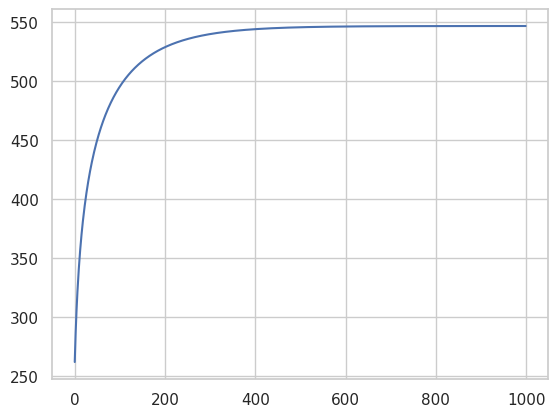

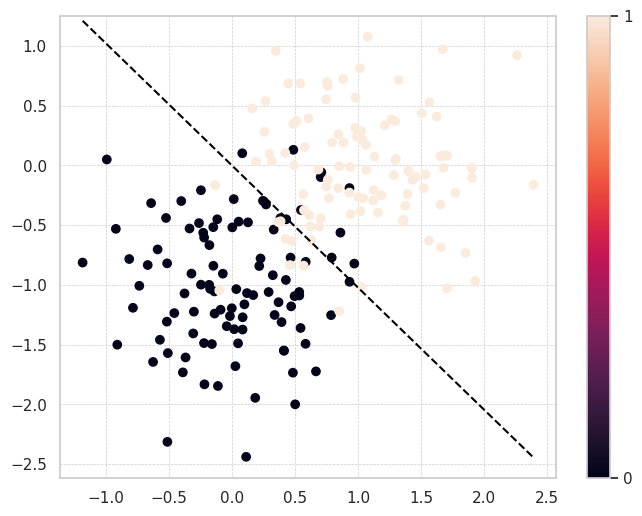

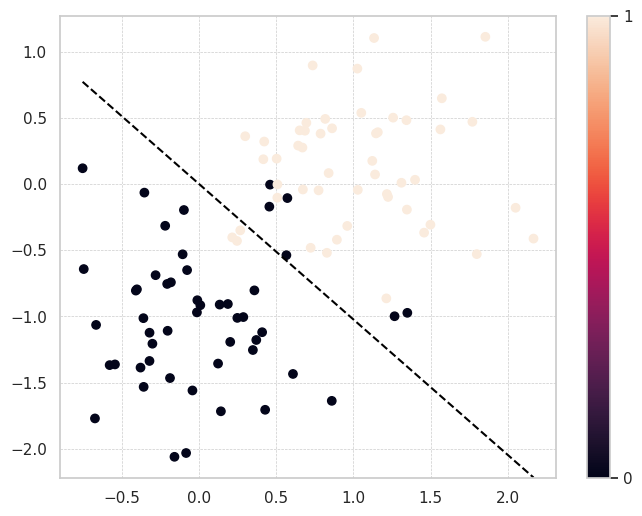

Estimated accuracy is 0.91
Estimated precision is 0.8867924528301887
Estimated recall is 0.94


In [ ]:
# Your Hyperparameters
lr = 0.95
main(lr)

# Part 2: Dealing with categorical data

A categorical variable can take on values on a finite set of fixed possible values. Samples from categorical assign each element to a particular group or nominal category on the basis of some qualitative property.

## Question 3:

Here you will predict the survival score of a passenger of the titanic disaster.

You will choose the prediciton variables $x$ from the available options and apply logistic regression on it to regress the 'survival' variable.

Here we have two types of variables: Numerical and categorical. For instance, the passenger Age can be an integer $\in [0, 120]$. The passenger class, on the other hand, can only be represented by $3$ values. The passenger sex by $2$ values.


Below are the functions that donwload and preprocess the data.


In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

gdd.download_file_from_google_drive(file_id='1zilQH06ud0nzmmqLUwCnwDHdJkNICBU4',
                                    dest_path='./titanic/data.zip',
                                    unzip=True)
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

# preprocess data

train.drop("Cabin",inplace=True,axis=1)
test.drop("Cabin",inplace=True,axis=1)

train = train[train['Age'].notna()]
test = test[test['Age'].notna()]


train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0],inplace=True)

test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [ ]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [ ]:
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q


Categorical Values:

Training data shape:  (714, 11)


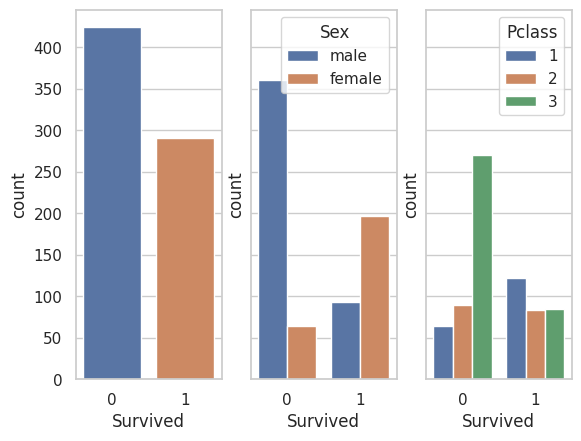

In [ ]:
print('Training data shape: ', train.shape)
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.countplot(x = 'Survived',data = train, ax = ax1)
sns.countplot(x = 'Survived',hue = 'Sex',data = train, ax = ax2)
sns.countplot(x = 'Survived',hue = 'Pclass',data = train, ax = ax3)

plt.show()

**Up to you**

Apply logistic regression on the training data to predict if a passenger survived or not given the variables of your choosing. A possible approach is to encode the categorical variables in an appropriate way such that logistic regression can be applied.

Justify your choices and validate your results using the validation dataset of your choosing.

Please, don't "waste" time finetuning your model, this is not a competition. Always remember that we just want to evaluate your understanding of the problem and theory.

**Optional**: If you want to compete, you can check the result of your model test prediction on the following kaggle challenge:

https://www.kaggle.com/c/titanic/data

You have to export the data on the corresponding data format.

In [ ]:
# Example of training set
x_train = np.concatenate(((train['Age']-np.mean(train['Age'])).to_numpy()[:, None]/10, (train['Pclass']-2).to_numpy()[:, None]), axis = 1)

y_train = train['Survived'].to_numpy(float)[:, None]


# Compute a validation set of you choice
x_val = np.concatenate(((train['Age']-np.mean(train['Age'])).to_numpy()[:, None]/10, (train['Pclass']-2).to_numpy()[:, None]), axis = 1)
y_val = train['Survived'].to_numpy(float)[:, None]

# Test set
x_test = np.concatenate(((test['Age']-np.mean(test['Age'])).to_numpy()[:, None]/10, (test['Pclass']-2).to_numpy()[:, None]), axis = 1)

In [ ]:
def mainTit(xtrain, ytrain, xtest, lr):
  """
  Main function for training and testing the SVM

  Parameters:
  -----------
  `lr` : Learning Rate

  """
  #Training

  W, J = logRegTrain(xtrain, ytrain, lr)
  plotConvCurve(J)
  plotData(W, xtrain, ytrain)

  hwi = sigmoid(np.dot(np.transpose(xtest), W))
  ytest_pred = (hwi >= 0.5)*1
  hwi = sigmoid(np.dot(np.transpose(xtrain), W))
  ytrain_pred = (hwi >= 0.5)*1
  #Testing
  Nessai = 1

  a, p, r = logResTest(W, xtrain, ytrain)

  plotData(W, xtest, ytest_pred)
  print('Estimated accuracy is {}'.format(a))
  print('Estimated precision is {}'.format(p))
  print('Estimated recall is {}'.format(r))
  return ytest_pred, ytrain_pred

(2, 1)


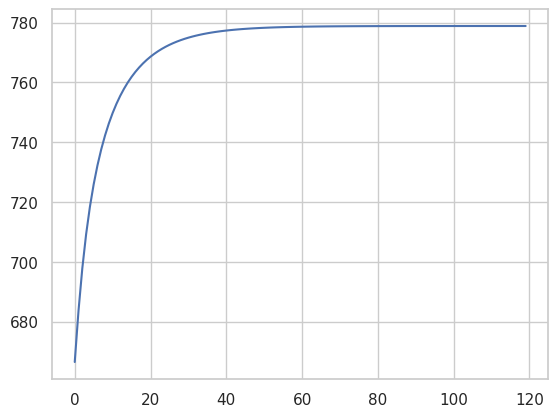

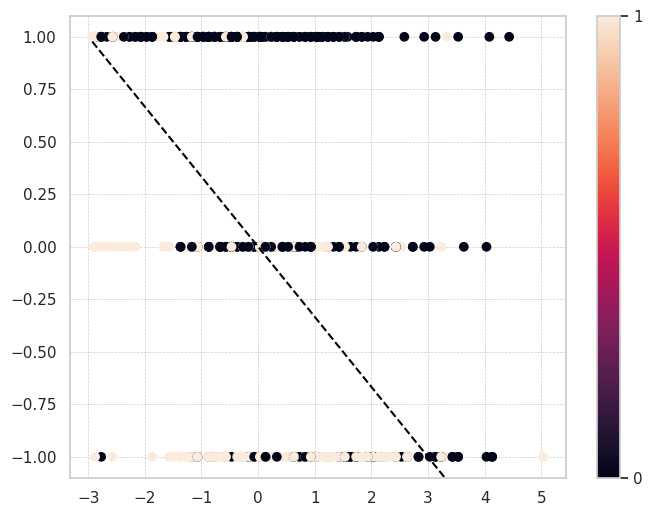

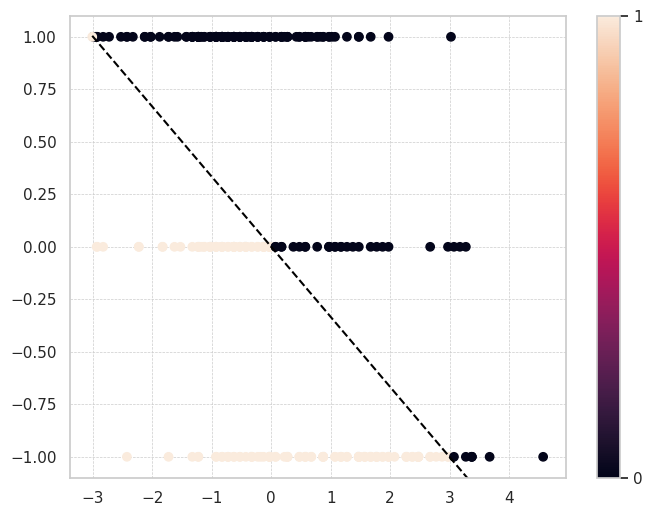

Estimated accuracy is 0.696078431372549
Estimated precision is 0.642023346303502
Estimated recall is 0.5689655172413793


In [ ]:
lr =0.95

y_pred_test, y_pred_train = mainTit(x_train.T, y_train.T, x_test.T, lr)

In [ ]:

y_pred_val = np.zeros(y_val.shape)

Print the Confusion matrix of your prediction

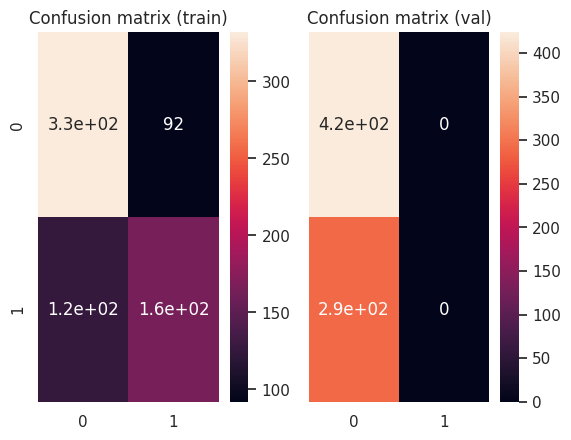

In [ ]:
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Get the confusion matrix
cf_matrix_test = confusion_matrix(y_val, y_pred_val)

# Plot with sns

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.heatmap(cf_matrix_train, annot=True, ax = ax1).set(title='Confusion matrix (train)')
sns.heatmap(cf_matrix_test, annot=True, ax = ax2).set(title='Confusion matrix (val)')


plt.show()

# Part 3: Linear Regression for Housing Prices prediction

Linear regression is a common statistical tool for modeling the relationship between some “explanatory” variables and some real valued outcome.

The hypothesis class of linear regression predictors is simply the set of linear
functions:

The hypothesis class $\mathcal{H}_W$ is defined as the set of functions parametrized by $W$:

$$\mathcal{H}_W = \{x \mapsto \langle W, x \rangle : W \in \mathbb{R}^d \}$$

A common loss function is the squared loss:

$$
l_{mse}(h,(x, y)) = (h(x) − y)^2
$$

The corresponding empirical risk function is called the Mean Squared
Error, namely,

$$\mathcal{L}_S(h) = \frac{1}{N} \sum^N_{i=1}(h(x_i) - y_i)^2
$$

The problem above is convex and in fact has closed form solution, easily obtained by taking the gradient w.r.p. to $W$ and equaling to zero.

Let $X$ be defined as the $N \times d$ matrix where each row corresponds to sample $x^{(i)}$ and each column corresponds to the dimension $j$. Namely, $X_{ij}$ corresponds to feature $j$ of sample $i$:

$$
X = \begin{bmatrix} x^{(1)}_1 & x^{(1)}_2 & \dots & x^{(1)}_d \\ x^{(2)}_1 & x^{(2)}_2 & \dots & x^{(2)}_d \\ x^{(3)}_1 & x^{(3)}_2 & \dots & x^{(3)}_d \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ x^{(N)}_1 & x^{(N)}_2 & \dots & x^{(N)}_d \\ \end{bmatrix}
$$

And $Y$ be a $N \times 1$ column vector where each row corresponds to the ground truth label.

$$Y = \begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
y^{(3)} \\
\vdots \\
y^{(N)} \\
\end{bmatrix}$$

Then, the closed form solution of the MSE problem is given by:

$$W^* = (X^T \times X)^{-1}\times X^T \times Y$$

It is also possible to add a regularization term to the MSE penalization loss that also have efficient solutions.

* Ridge regression: If we add the L2 norm penalization ($\lambda ||W||_2$) we obtain the famous Ridge regression which has close form solution as the penalty is also convex on $W$.

* Lasso regression: If we add the L1 norm penalization ($\lambda ||W||_1$) we obtain Lasso regression, which typically requires iterative methods like coordinate descent as the problems is not convex.

* Elastic Net: If we add a combination of both the L2 and L1 norm penalization ($\lambda_2 ||W||_2 + \lambda_1 ||W||_1$) we obtain Elastic Net regression, a hybrid method that combines L1 and L2 regularization, offering a balance between Lasso and Ridge.

Here you will use linear regression as offered by sklearn https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Data is found in the Kaggle website : https://www.kaggle.com/datasets/vedavyasv/usa-housing

## Question 4:
- Load the data
- Remove the last column (address)
- Plot the correlation matrix for the data, in order to see how the variables are correlated with each other. Comment the result.
- Split the data into a training set and a test set (75/25)
- Predict the price of houses with linear regression model.
- Compute the mean absolute error of the test set.
- Plot the actual price of the test data set versus its prediction. Comment the results.


In [ ]:
# Download and process the data :
def data_US():
  data_us = pd.read_csv('USA_Housing.csv')
  data_us.drop('Address', axis=1, inplace=True)
  return data_us

In [ ]:
data_us = data_US()
data_us.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


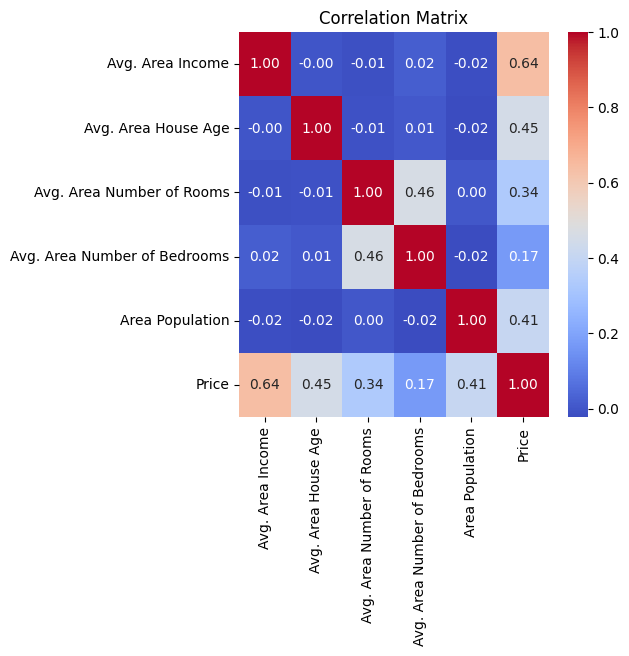

In [ ]:
#Conrrelation matrix
correlation_matrix = data_us.corr()

plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

*Avg. Area Number of Rooms is independent of Area Population and Avg. Area Income is indepedent of Avg. Are House Age. All the other pairs of variables are correlated.*

In [ ]:
def main():
  #Load data
  data_us = data_US()

  X = data_us.iloc[:,:-1] #Features : Avg. Area Income,	Avg. Area House Age,	Avg. Area Number of Rooms,	Avg. Area Number of Bedrooms,	Area Population	.
  y = data_us.iloc[:,-1] #Target : Price

  #Split the data into a training set and a test set (75/25)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

  #Linear regresson
  model = LinearRegression()
  model.fit(X_train, y_train)

  #Prediction
  y_pred = model.predict(X_test)

  #Model evaluation using the Mean Absolute Error
  mae = mean_absolute_error(y_test, y_pred)

  # Plot actual vs. predicted prices
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_pred, alpha=0.5)
  plt.xlabel("Actual Price")
  plt.ylabel("Predicted Price")
  plt.title("Actual Price vs. Predicted Price")
  plt.show()

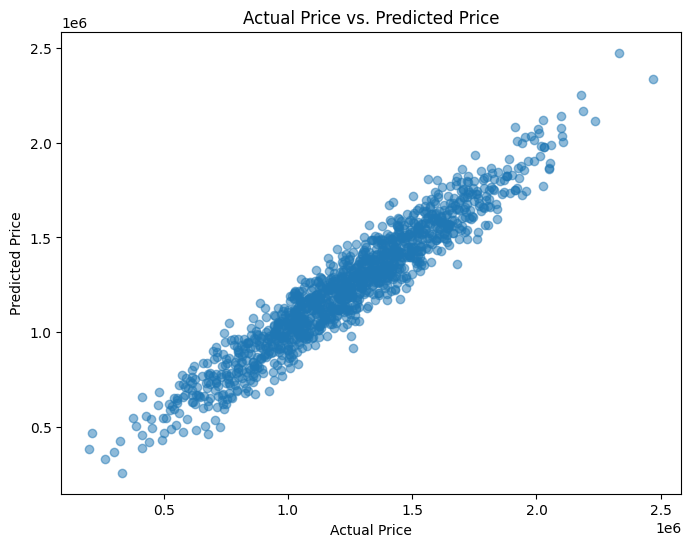

In [ ]:
main()

## References :
- Chapter 9 of the book : Understanding Machine Learning


# Comments of the students:

To improve the experience of students that will take the course on the future any thoughtful comment or suggestion will be much appreciated!

**Comments:**